## Import Packages
- First, let's run the cell below to import packages and the last cell with [Helper Functions](#helper).
- Back from Helper Function
<a id='helper_back'></a>

In [163]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Import Data

In [157]:
Name = ["wireline depth (m)", "wireline depth (ft)", 'density (g/cc)', 'caliper (inches)', 'gamma (API)',
       'thorium (ppm)', 'uranium (ppm)', 'potassium (cfcf)', 'neutron porosity (fraction)',
       'density porosity (fraction)', 'sp (millivolts)', 'total resitivity (ohms)', 'Vp (m/s)', 'Vs (m/s)']

datalist=[]     
with open("integratedLogSetV1.dat",'r') as f:
    count = 0
    for line in f:
        count += 1
        if count > 60:
            line = line.strip(); line = line.strip('\t')
            line = line.strip('\n'); line = line.split()
            numbers = [ float(x) for x in line ]
            datalist.append(numbers)
Data = np.array(datalist)

depth_upper = 5072
depth_lower = 5055
index = np.where((depth_lower <= Data[:,1]) & (Data[:,1]<= depth_upper))
DepthMeter = Data[index[0],0]; DepthFeet = Data[index[0],1]; Density = Data[index[0],2]
Porosity = Data[index[0],9]; Vp = 0.001*Data[index[0],12]; Vs = 0.001*Data[index[0],13]
dataframe = pd.DataFrame(Data, columns = Name)
dataframe

,wireline depth (m),wireline depth (ft),density (g/cc),caliper (inches),gamma (API),thorium (ppm),uranium (ppm),potassium (cfcf),neutron porosity (fraction),density porosity (fraction),sp (millivolts),total resitivity (ohms),Vp (m/s),Vs (m/s)
0,1432.000000,4698.162730,2.194461,7.539520,131.897880,15.609380,1.616571,0.018520,0.567007,0.276107,41.320658,0.783606,2439.356395,990.382029
1,1432.153153,4698.665201,2.209022,7.523779,128.596778,15.862643,1.527904,0.018902,0.524781,0.267288,41.076309,0.830039,2414.788666,1048.752970
2,1432.306306,4699.167672,2.204115,7.786098,120.976614,15.735018,1.286850,0.019352,0.448809,0.270253,40.575508,0.896921,2384.751760,1053.362627
3,1432.459459,4699.670143,2.186789,7.557013,122.041400,14.584112,1.455074,0.017999,0.418899,0.280729,40.455359,0.892992,2344.849686,1016.046465
4,1432.612613,4700.172614,2.171978,7.414361,125.089936,13.680124,1.616006,0.018168,0.465306,0.289679,40.190752,0.823024,2315.407242,987.028383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1584.387387,5198.121350,2.097600,7.004030,70.126899,8.603681,-0.467132,0.015018,0.343414,0.334782,-97.305497,0.281436,2683.234332,1326.971472
996,1584.540541,5198.623821,2.089523,6.985152,68.029800,8.429723,-0.388214,0.014482,0.342690,0.339669,-98.465205,0.261128,2668.565152,1315.957792
997,1584.693694,5199.126292,2.099555,6.985884,70.799300,8.028426,-0.473510,0.014152,0.336620,0.333644,-98.540181,0.267138,2652.189120,1250.290930
998,1584.846847,5199.628763,2.100438,6.992622,71.694699,6.243865,0.194189,0.014288,0.335481,0.333083,-97.553864,0.271357,2614.873064,1136.625966


## Problem 1

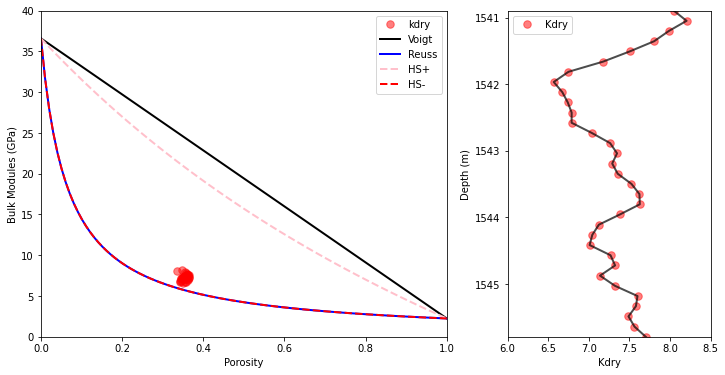

In [158]:
Kb = 2.25
Ub = 0.0
Kqtz = 36.6
Uqtz =  45.0

# Calculate Voigt-Reuss bounds and Hashin-Shtrikman for a mixture of quartz and water
Fb = np.linspace(0.0, 1.0, num=100)
Poro = Fb / 1
Kvoigt = voigt_bound(Fb, Kb, Kqtz)
Uvoigt = voigt_bound(Fb, Ub, Uqtz)
Kreuss = reuss_bound(Fb, Kb, Kqtz)
Ureuss = reuss_bound(Fb, Ub, Uqtz)
K2HSu, K2HSl, U2HSu, U2HSl = hashin_shtrikman(Fb, Kb, Ub, Kqtz, Uqtz)

# Calculate kdry
num = len(DepthMeter)
ksat = Density*(Vp**2-4/3*Vs**2)
usat = Density*(Vs**2)
kmin = Kqtz*np.ones(num)
umin = Uqtz*np.ones(num)
kf = Kb*np.ones(num)
uf = Ub*np.ones(num)
kdry = gassmann_kdry(ksat, kmin, kf, Porosity)

# Plot bulk modulus with porosity
fig, axs = plt.subplots(1, 2,gridspec_kw=dict(width_ratios=[2, 1]), figsize=(12, 6))
axs[0].plot(Porosity, kdry, '.',markersize=15, color='red', alpha=0.5,label='kdry')
axs[0].plot(Poro, Kvoigt,linestyle='-', color='black',linewidth=2, alpha=1,label='Voigt')
axs[0].plot(Poro, Kreuss,linestyle='-', color='Blue',linewidth=2, alpha=1,label='Reuss')
axs[0].plot(Poro, K2HSu,linestyle='--', color='pink',linewidth=2, alpha=1,label='HS+')
axs[0].plot(Poro, K2HSl,linestyle='--', color='red',linewidth=2, alpha=1,label='HS-')
axs[0].legend(loc='upper right',fontsize=10, shadow=False)
axs[0].set_xlim(0, 1)
axs[0].set_ylim(0, 40)
axs[0].set_xlabel('Porosity')
axs[0].set_ylabel('Bulk Modules (GPa)')

# Plot bulk modulus with depth
axs[1].plot(kdry, DepthMeter,'.',markersize=15, color='red', alpha=0.5,label='Kdry')
axs[1].plot(kdry, DepthMeter, linestyle='-', color='black',linewidth=2, alpha=0.7)
axs[1].legend(loc='upper left',fontsize=10, shadow=False)
axs[1].set_xlim(6, 8.5)
axs[1].set_ylim(DepthMeter[0], DepthMeter[-1])
axs[1].set_xlabel('Kdry')
axs[1].set_ylabel('Depth (m)')
axs[1].invert_yaxis()
fig.savefig('./p2-problem-1.pdf', dpi=800, format='pdf')

## Problem 2

In [159]:
Densityb = 1.03
DensityQuartz = 2.65
Densitymin = (Density - Porosity*Densityb) / (1 - Porosity)
print("Density Quartz: "+str(round(DensityQuartz,3))+' (g/cc)'+'\n'
      + "Density mineral: "+str(round(np.mean(Densitymin),3))+' (g/cc)')

Density Quartz: 2.65 (g/cc)
Density mineral: 2.634 (g/cc)


## Problem 3

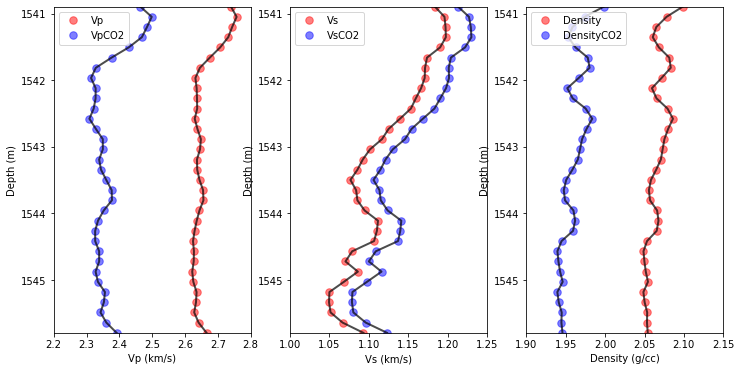

In [160]:
Kb = 2.25
Ub = 0.0
Kqtz = 36.6
Uqtz =  45.0
DensityQuartz = 2.65
Ksc = 0.09
Usc = 0.0
DensityscCO2 = 0.7
num = len(DepthMeter)

# 1.Calculate moduli of the data using the measured velocities and density (the in-situ case)
ksat = Density*(Vp**2-4/3*Vs**2)
usat = Density*(Vs**2)

# 2.Compute the total porosity
Porosity = Porosity

# 3.Estimate or assume constant the mineral bulk modulus and the in situ fluid bulk modulus
kmin = Kqtz*np.ones(num)
umin = Uqtz*np.ones(num)
kf = Kb*np.ones(num)
uf = Ub*np.ones(num)

# 4.Calculate kdry
kdry = gassmann_kdry(ksat, kmin, kf, Porosity)

# 5.Compute new fluid bulk modulus using Reuss bounds for a mixture of fluids
kf2 = Ksc*np.ones(num)

# 6.Compute saturated rock bulk modulus
ksat2 = gassmann_ksat(kdry, kmin, kf2, Porosity)

# 7.Employ shear modulus equivalence
usat2 = usat

# 8.Transform density
density2 = (1-Porosity)*DensityQuartz + Porosity*DensityscCO2

# 9.Compute the new velocities
Vp2 = np.power((ksat2+4/3*usat2)/density2, 1/2)
Vs2 = np.power(usat2/density2, 1/2)

# Plot Vp with depth
fig, axs = plt.subplots(1, 3,gridspec_kw=dict(width_ratios=[1,1, 1]), figsize=(12, 6))
axs[0].plot(Vp, DepthMeter,'.',markersize=15, color='red', alpha=0.5,label='Vp')
axs[0].plot(Vp, DepthMeter, linestyle='-', color='black',linewidth=2, alpha=0.7)
axs[0].plot(Vp2, DepthMeter,'.',markersize=15, color='blue', alpha=0.5,label='VpCO2')
axs[0].plot(Vp2, DepthMeter, linestyle='-', color='black',linewidth=2, alpha=0.7)
axs[0].legend(loc='upper left',fontsize=10, shadow=False)
axs[0].set_xlim(2.2, 2.8)
axs[0].set_ylim(DepthMeter[0], DepthMeter[-1])
axs[0].set_xlabel('Vp (km/s)')
axs[0].set_ylabel('Depth (m)')
axs[0].invert_yaxis()

# Plot Vs with depth
axs[1].plot(Vs, DepthMeter,'.',markersize=15, color='red', alpha=0.5,label='Vs')
axs[1].plot(Vs, DepthMeter, linestyle='-', color='black',linewidth=2, alpha=0.7)
axs[1].plot(Vs2, DepthMeter,'.',markersize=15, color='blue', alpha=0.5,label='VsCO2')
axs[1].plot(Vs2, DepthMeter, linestyle='-', color='black',linewidth=2, alpha=0.7)
axs[1].legend(loc='upper left',fontsize=10, shadow=False)
axs[1].set_xlim(1.0, 1.25)
axs[1].set_ylim(DepthMeter[0], DepthMeter[-1])
axs[1].set_xlabel('Vs (km/s)')
axs[1].set_ylabel('Depth (m)')
axs[1].invert_yaxis()

# Plot Density with depth
axs[2].plot(Density, DepthMeter,'.',markersize=15, color='red', alpha=0.5,label='Density')
axs[2].plot(Density, DepthMeter, linestyle='-', color='black',linewidth=2, alpha=0.7)
axs[2].plot(density2, DepthMeter,'.',markersize=15, color='blue', alpha=0.5,label='DensityCO2')
axs[2].plot(density2, DepthMeter, linestyle='-', color='black',linewidth=2, alpha=0.7)
axs[2].legend(loc='upper left',fontsize=10, shadow=False)
axs[2].set_xlim(1.90, 2.15)
axs[2].set_ylim(DepthMeter[0], DepthMeter[-1])
axs[2].set_xlabel('Density (g/cc)')
axs[2].set_ylabel('Depth (m)')
axs[2].invert_yaxis()
fig.savefig('./p2-problem-3.pdf', dpi=800, format='pdf')

## Problem 4

$ reflectivity = \frac{(\rho_2*V_2 - \rho_1*V_1) }{ (\rho_2*V_2 + \rho_1*V_1)} $

## Helper Functions
<a id='helper'></a>

In [161]:
def gassmann_kdry(ksat, kmin, kf, phi):
    """
    Applies the direct Gassmann's equation to calculate the dry rock
    bulk modulus from porosity and the saturated-rock, mineral and fluid bulk moduli.
    Args:
        ksat (array): saturated-rock bulk modulus.
        kmin (array): mineral bulk modulus.
        kf (array): fluid bulk modulus.
        phi (array): Porosity.
    Returns:
        kdry (array): dry rock bulk modulus.
    """
    a = ksat*((phi*kmin)/kf + 1 - phi) - kmin
    b = (phi*kmin)/kf + ksat/kmin - 1 - phi
    kdry = a/b
    
    return kdry


def gassmann_ksat(kdry, kmin, kf, phi):
    """
    Applies the direct Gassmann's equation to calculate the saturated rock
    bulk modulus from porosity and the dry-rock, mineral and fluid bulk moduli.
    Args:
        kdry (array): dry-rock bulk modulus.
        kmin (array): mineral bulk modulus.
        kf (array): fluid bulk modulus.
        phi (array): Porosity.
    Returns:
        ksat (array): saturated rock bulk modulus.
    """

    a = (1 - kdry/kmin)**2.0
    b = phi/kf + (1-phi)/kmin - (kdry/kmin**2.0)
    ksat = kdry + (a/b)

    return ksat


def voigt_bound(F1, k1, k2):
    """
    The upper bound for a mixture of two constituents.
    
    Args:
        F1: array of N volume fractions of first minerals (array, between 0 and 1).
        k1: elastic modulus of first minerals (float or int).
        k2: elastic modulus of second minerals (float or int).
    Returns:
        Kvoigt: Voigt upper bound (array).
    """
    num = len(F1)
    F2 = 1 - F1
    K1 = k1 * np.ones(num)
    K2 = k2 * np.ones(num)
    Kvoigt = F1 * K1 + F2 * K2

    return Kvoigt


def reuss_bound(F1, k1, k2):
    """
    The lower bound for a mixture of two constituents.
    
    Args:
        F1: array of N volume fractions of first minerals (array, between 0 and 1).
        k1: elastic modulus of first minerals (float or int).
        k2: elastic modulus of second minerals (float or int).
    Returns:
        Kreuss: Reuss lower bound (array).
    """
    num = len(F1)
    F2 = 1 - F1
    K1 = k1*np.ones(num)
    K2 = k2*np.ones(num)
    if k1 != 0:
        Kreuss = 1.0 / (F1/K1+F2/K2)
    else:
        Kreuss = 0*np.ones(num) 
    index = np.where(F1==0)
    Kreuss[index] = 1.0 / (F2[index]/k2)
    
    return Kreuss


def hill_average(F1, k1, k2):
    """
    Voigt-Reuss-Hill bounds for a mixture of two constituents.
     
    Args:
        F1: array of N volume fractions of first minerals (array, between 0 and 1).
        k1: elastic modulus of first minerals (float or int).
        k2: elastic modulus of second minerals (float or int).
    Returns:
        Khill: Hill bound (array).
    """
    Kvoigt = voigt_bound(F1, k1, k2)
    Kreuss = reuss_bound(F1, k1, k2)
    Khill = (Kvoigt + Kreuss) / 2.0
    
    return Khill


def hashin_shtrikman(F1, k1, u1, k2, u2):
    """
    Hashin-Shtrikman bounds for a mixture of two constituents.
    
    Args:
        F1: array of N volume fractions of first minerals (array, between 0 and 1).
        k1: bulk modulus of first minerals (float or int).
        u1: shear modulus of first minerals (float or int).
        k2: bulk modulus of second minerals (float or int).
        u2: shear modulus of second minerals (float or int).
    Returns:
        Khill: Hashin-Shtrikman bound (4*array).
    """
    c=4/3;
    F2 = 1-F1
    kmx=max(k1,k2)
    kmn=min(k1,k2)
    umx=max(u1,u2)
    umn=min(u1,u2)
    
    Ku = []; Kl = [];
    Uu = []; Ul = [];
    for i in range(0,len(F1)):
        F = np.array([F1[i], F2[i]])
        K = np.array([k1, k2])
        U = np.array([u1, u2])
        Kupper=1/np.sum(F/(K+c*umx))-c*umx     # HS K upper bound
        Klow=1/np.sum(F/(K+c*umn))-c*umn       # HS K lower bound
        etamx=umx*(9*kmx+8*umx)/(kmx+2*umx)/6
        etamn=umn*(9*kmn+8*umn)/(kmn+2*umn)/6
        Uupper=1/np.sum(F/(U+etamx))-etamx     # HS U upper bound
        if min(U) != 0:
            Ulow=1/np.sum(F/(U+etamn))-etamn   # HS U lower bound        
        else:
            Ulow=0
        if F1[i]==0:
            Ulow=1/np.sum(F2[i]/(u2+etamn))-etamn            
        Ku.append(Kupper); Kl.append(Klow); 
        Uu.append(Uupper); Ul.append(Ulow); 
                      
    return np.array(Ku), np.array(Kl), np.array(Uu), np.array(Ul)

-[Turn back!](#helper_back)